In [ ]:
!pip install opendatasets
import opendatasets as od
import pandas
od.download('https://www.kaggle.com/datasets/loki4514/rice-leaf-diseases-detection')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rahat101
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/loki4514/rice-leaf-diseases-detection


100%|██████████| 8.03G/8.03G [01:46<00:00, 81.1MB/s]


In [ ]:
!pip install Keras
!pip install vit-keras
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 5.4 MB/s eta 0:00:00


In [ ]:
from vit_keras import vit, utils

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model

In [ ]:
import os
import keras.preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras import layers
from keras import regularizers, activations
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Flatten, Activation, Concatenate, Lambda
from keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from keras.applications import ResNet50V2
from keras.preprocessing.image import ImageDataGenerator
from vit_keras import vit, utils

In [ ]:
DATA_DIR = '/content/rice-leaf-diseases-detection/Rice_Leaf_AUG/Rice_Leaf_AUG'
Base_DIR = '/content/rice-leaf-diseases-detection/Rice_Leaf_AUG'


CATEGORIES = []

for i in os.listdir(DATA_DIR):
  CATEGORIES.append(i)
print(CATEGORIES)

['Sheath Blight', 'Bacterial Leaf Blight', 'Healthy Rice Leaf', 'Brown Spot', 'Neck_Blast', 'Rice Hispa', 'Leaf Blast', 'Leaf scald', 'Narrow Brown Leaf Spot']


In [ ]:
train_dir = os.path.join(Base_DIR, 'train')
os.makedirs(train_dir, exist_ok=True)
test_dir = os.path.join(Base_DIR, 'test')
os.makedirs(test_dir, exist_ok=True)
val_dir = os.path.join(Base_DIR, 'val')
os.makedirs(val_dir, exist_ok=True)

In [ ]:
import shutil
# class_folders = ["Hispa", "LeafBlast", "BrownSpot", "Healthy"]
train_ratio = 0.6
val_ratio = 0.3
test_ratio = 0.1

for folder in CATEGORIES:
  source_folder = os.path.join(DATA_DIR, folder)
  train_dest = os.path.join(train_dir, folder)
  val_dest = os.path.join(val_dir, folder)
  test_dest = os.path.join(test_dir, folder)

  os.makedirs(train_dest, exist_ok=True)
  os.makedirs(val_dest, exist_ok=True)
  os.makedirs(test_dest, exist_ok=True)


  filenames = os.listdir(source_folder)
  num_files = len(filenames)


  num_train = int(num_files * train_ratio)
  num_val = int(num_files * val_ratio)
  num_test = int(num_files * test_ratio)

  train_files = filenames[:num_train]
  val_files = filenames[num_train:num_train + num_val]
  test_files = filenames[num_train + num_val:]




  for file in train_files:
    src_path = os.path.join(source_folder, file)
    dest_path = os.path.join(train_dest, file)
    shutil.copy(src_path, dest_path)
  for file in val_files:
    src_path = os.path.join(source_folder, file)
    dest_path = os.path.join(val_dest, file)
    shutil.copy(src_path, dest_path)
  for file in test_files:
    src_path = os.path.join(source_folder, file)
    dest_path = os.path.join(test_dest, file)
    shutil.copy(src_path, dest_path)


In [ ]:
size = 224
batch_size = 64
target_size = (size, size)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=batch_size)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False)

Found 7071 images belonging to 9 classes.
Found 3533 images belonging to 9 classes.
Found 1186 images belonging to 9 classes.


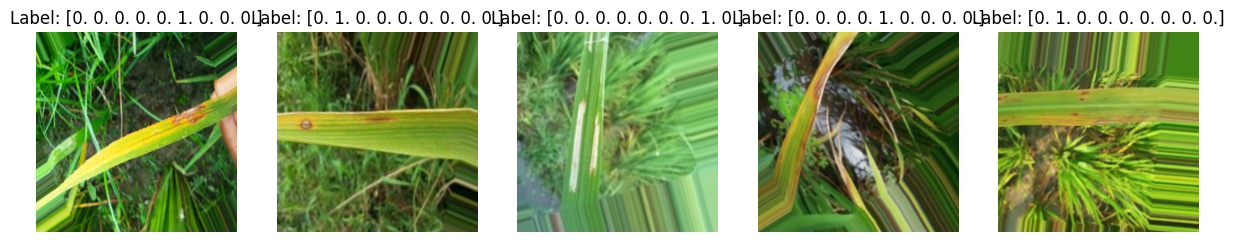

In [ ]:
import matplotlib.pyplot as plt

num_samples = 5
sample_images, sample_labels = next(train_generator)
plt.figure(figsize=(15, 10))
for i in range(num_samples):
  plt.subplot(1, num_samples, i+1)
  plt.imshow(sample_images[i])
  plt.title(f"Label: {sample_labels[i]}")
  plt.axis('off')
plt.show()

In [ ]:
!pip install transformers

In [ ]:
import tensorflow_hub as hub
# from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
import tensorflow_addons as tfa
# from tensorflow.keras.applications import EfficientNetB6
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications import ResNet50


# Define the input layer
input_layer = Input(shape=(224,224,3))

# Load the Bit model from TF Hub
bit_model_url = "https://tfhub.dev/google/bit/m-r50x1"

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet152
import tensorflow_hub as hub

def create_vit_bit_model(input_shape, num_classes, bit_model_url):
    # ResNet152 as the backbone
    resnet_backbone = ResNet152(weights='imagenet', include_top=False, input_shape=input_shape)

    # Loading Big Transfer (BiT) model
    big_transfer = hub.KerasLayer(bit_model_url, trainable=False)

    # Freezing the weights of ResNet152
    resnet_backbone.trainable = False

    # Input layer
    input_layer = layers.Input(shape=input_shape)

    # Passing input through ResNet152 and BiT models
    resnet_features = resnet_backbone(input_layer)
    big_features = big_transfer(input_layer)

    # Flattening ResNet152 features before concatenation
    flatten_resnet = layers.GlobalAveragePooling2D()(resnet_features)

    # Concatenating features
    combined_features = layers.Concatenate()([flatten_resnet, big_features])

    # Flattening and adding dense layers for classification
    flatten = layers.Flatten()(combined_features)
    dense = layers.Dense(1024, activation='relu')(flatten)
    output_layer = layers.Dense(num_classes, activation='softmax')(dense)

    # Creating model
    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

    return model


In [ ]:
input_shape = (224, 224, 3)  # Input image shape
num_classes = 9  # Number of output classes


model = create_vit_bit_model(input_shape, num_classes, bit_model_url)


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

234698864/234698864 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 resnet152 (Functional)      (None, 7, 7, 2048)           5837094   ['input_3[0][0]']             
                                                          4                                       
                                                                                                  
 global_average_pooling2d (  (None, 2048)                 0         ['resnet152[0][0]']           
 GlobalAveragePooling2D)                                                                          
                           

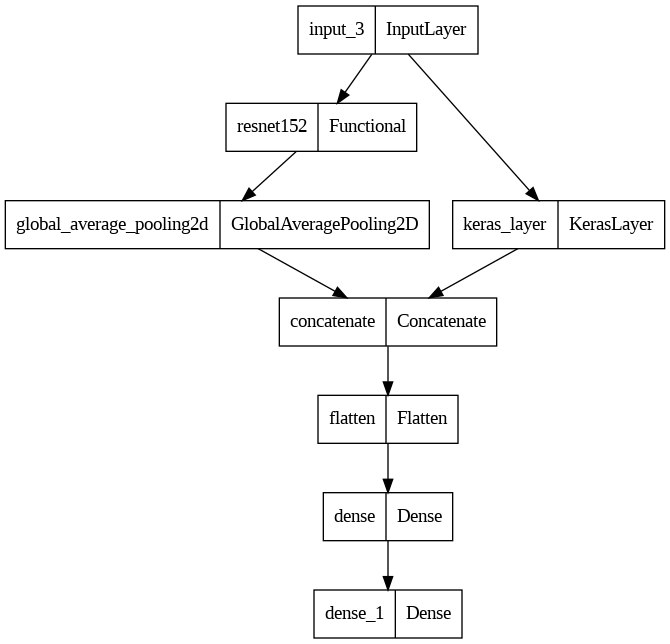

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,'model.png')

In [ ]:
epochs = 100

In [ ]:
progess = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/100
111/111 [==============================] - 335s 3s/step - loss: 2.1620 - accuracy: 0.6160 - val_loss: 0.7217 - val_accuracy: 0.7427
Epoch 2/100
111/111 [==============================] - 269s 2s/step - loss: 0.6751 - accuracy: 0.7623 - val_loss: 0.6622 - val_accuracy: 0.7671
Epoch 3/100
111/111 [==============================] - 262s 2s/step - loss: 0.5669 - accuracy: 0.7992 - val_loss: 0.4582 - val_accuracy: 0.8381
Epoch 4/100
111/111 [==============================] - 272s 2s/step - loss: 0.4944 - accuracy: 0.8253 - val_loss: 0.4431 - val_accuracy: 0.8474
Epoch 5/100
111/111 [==============================] - 268s 2s/step - loss: 0.4480 - accuracy: 0.8392 - val_loss: 0.4233 - val_accuracy: 0.8503
Epoch 6/100
111/111 [==============================] - 264s 2s/step - loss: 0.4196 - accuracy: 0.8515 - val_loss: 0.3639 - val_accuracy: 0.8692
Epoch 7/100
111/111 [==============================] - 265s 2s/step - loss: 0.3537 - accuracy: 0.8743 - val_loss: 0.3656 - val_accuracy:

<Figure size 640x480 with 0 Axes>

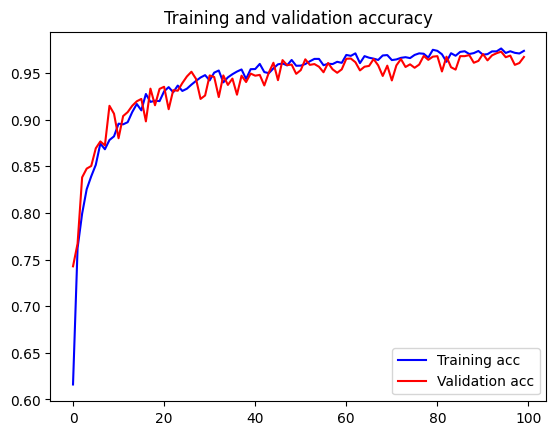

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

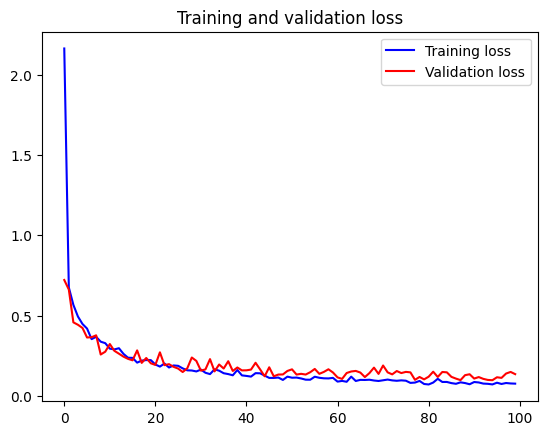

In [ ]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

19/19 [==============================] - 21s 1s/step - loss: 0.1367 - accuracy: 0.9604
Test Loss: 0.1367
Test Accuracy: 0.9604


In [ ]:
test_labels = np.array(test_generator.labels)

19/19 [==============================] - 21s 1s/step


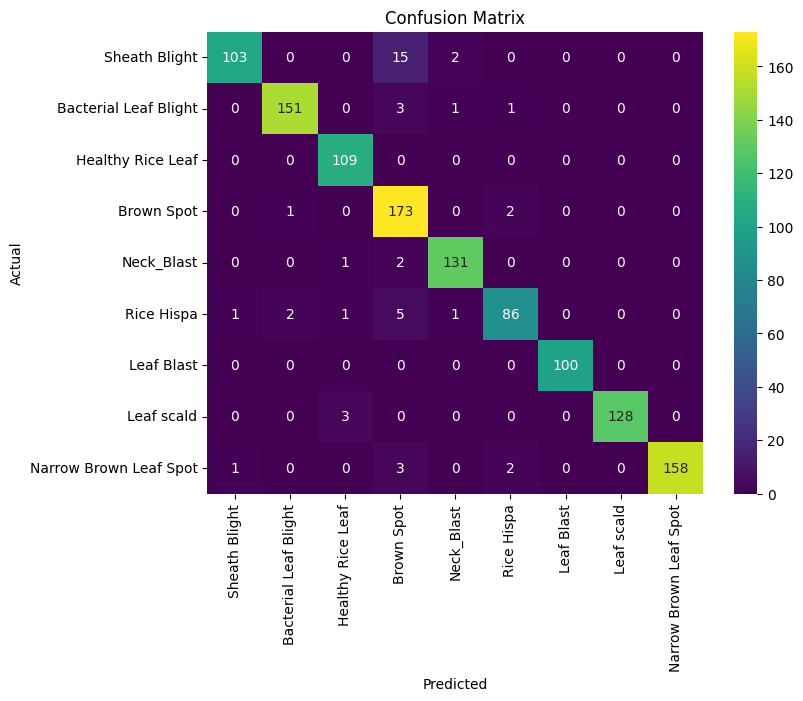

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already trained and compiled your model
# train_ds is your training dataset

# Make predictions using the trained model
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the actual labels from the dataset

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(test_labels, predicted_labels)
# classes = class_folders


# Assuming you have already trained and compiled your model
# train_ds is your training dataset
classes = CATEGORIES

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='viridis',
            xticklabels=classes, yticklabels=classes)  # Replace 'classes' with your class labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

cm = confusion_mtx
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]


# Calculate metrics
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

In [ ]:
from sklearn.metrics import classification_report

# Assuming true_labels contains the ground truth labels and predicted_labels contains the predicted labels
report = classification_report(test_labels, predicted_labels)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       120
           1       0.98      0.97      0.97       156
           2       0.96      1.00      0.98       109
           3       0.86      0.98      0.92       176
           4       0.97      0.98      0.97       134
           5       0.95      0.90      0.92        96
           6       1.00      1.00      1.00       100
           7       1.00      0.98      0.99       131
           8       1.00      0.96      0.98       164

    accuracy                           0.96      1186
   macro avg       0.97      0.96      0.96      1186
weighted avg       0.96      0.96      0.96      1186

